In [2]:
import quool as q
import numpy as np
import pandas as pd

In [5]:
a = q.Series(np.random.normal(0, 1, size=1000))

<AxesSubplot:ylabel='Frequency'>

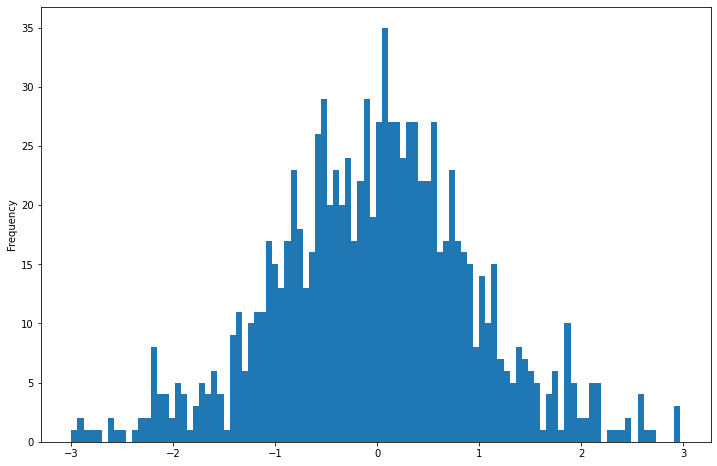

In [12]:
a.preprocessor.deextreme(method='std').drawer.draw('hist', bins=100)

In [14]:
a.printer.display()

             Table              
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ index ┃          0           ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│   0   │ 0.011893729771931368 │
│   1   │ -0.29653642220336646 │
│   2   │  1.1759514401809659  │
│   3   │ 0.19446006958787215  │
│   4   │ -0.5971658551386925  │
│   5   │  0.5289250320576966  │
│   6   │  -1.088872332134424  │
│   7   │  1.1166002009223326  │
│   8   │  1.9532403301504313  │
│   9   │  0.3304757056456227  │
│  ...  │         ...          │
│  990  │  0.8758957226598775  │
│  991  │ 0.33827528185765177  │
│  992  │ -1.9515971957787672  │
│  993  │ -2.2953804012218506  │
│  994  │  0.815466959606096   │
│  995  │  -0.79128626371363   │
│  996  │  1.043200572099546   │
│  997  │ -0.07944432684982769 │
│  998  │  2.071906545818764   │
│  999  │ -0.5105938425527393  │
└───────┴──────────────────────┘